In [1]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo.policies import CnnPolicy
from stable_baselines3.ppo.policies import MlpPolicy
from utils.adversary_env import AdversaryEnv
from utils.cartpole_wrapper import CartPoleWrapper
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# Load target model
target_model = PPO.load("../ppo/models/cartpole-v1/cartpole_v1_ppo_510K")

In [6]:
# Test target model - for info on why the env is wrapped with Monitor check the evaluate_policy function
mean_reward, std_reward = evaluate_policy(target_model, Monitor(CartPoleWrapper(gym.make('CartPole-v1'))), n_eval_episodes=50)
print(f"mean_reward: {mean_reward:.2f} +/- {std_reward:.2f}")

mean_reward: 490.73 +/- 2.19


In [7]:
# Create adversary with adversary env
# adversary_env = AdversaryEnv(CartPoleWrapper(gym.make('CartPole-v1')), target_model)
# adversary = PPO(MlpPolicy, adversary_env, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Train adversary
# log_dir = "./out/training-log/"
# log_path = log_dir + f"adversary-adversary-cartpole-v1/"
# save_dir = "./models/adversary-cartpole-v1/"

# timesteps = 50000

# adversary.learn(
#         total_timesteps=timesteps,
#         callback=None,
#         log_interval=-1,
#         eval_env=adversary_env, 
#         eval_freq=5000, 
#         n_eval_episodes=100,
#         tb_log_name='PPO',
#         eval_log_path=log_path, 
#         reset_num_timesteps=False
#         )

# # Save adversary
# adversary.save(save_dir + f"adversary_cartpole_v1_{timesteps}")

In [2]:
# Load adversary
save_dir = "./models/adversary-cartpole-v1/"

adversary = PPO.load(save_dir + f"adversary_cartpole_v1_50000")
adversary_env = AdversaryEnv(CartPoleWrapper(gym.make('CartPole-v1')), target_model)

In [3]:
import numpy as np
import pandas as pd
from uniform_attack import UniformAttack

# Evaluate uniform adversarial attack over different epsilon
data_dict = {
    'epsilon': [],
    'mean_rew': [],
    'mean_perturbation': [],
    'mean_n_timesteps': [],
    'mean_n_attacks': []
}

n_episodes = 50

for j in range(1, 50):
    epsilon = j/100

    all_episodes_rewards = []
    all_episodes_perturbation = []
    all_episodes_n_timesteps = []
    all_episodes_n_attacks = []

    for i in range(0, n_episodes):
        # Run attack on a2c model
        env = CartPoleWrapper(gym.make('CartPole-v1'))
        ua = UniformAttack(env=env, model=target_model, attack=adversary, epsilon=epsilon)
        ua.perform_attack()

        all_episodes_rewards.append(ua.reward_total)
        all_episodes_perturbation.append(ua.perturbation_total)
        all_episodes_n_timesteps.append(ua.frames_count)
        all_episodes_n_attacks.append(ua.n_attacks)

        ua.reset_attack()

    data_dict['epsilon'].append(epsilon)
    data_dict['mean_rew'].append(np.round(np.mean(all_episodes_rewards), 2))
    data_dict['mean_perturbation'].append(np.round(np.mean(all_episodes_perturbation), 2))
    data_dict['mean_n_timesteps'].append(np.round(np.mean(all_episodes_n_timesteps), 2))
    data_dict['mean_n_attacks'].append(np.round(np.mean(all_episodes_n_attacks), 2))

    print("------------------------------------------")
    print(
        f"{data_dict['epsilon'][-1] = }: \n" +
        f"{data_dict['mean_rew'][-1] = }, \n" +
        f"{data_dict['mean_perturbation'][-1] = } \n" +
        f"{data_dict['mean_n_timesteps'][-1] = } \n" +
        f"{data_dict['mean_n_attacks'][-1] = }"
        )
    print("------------------------------------------")

------------------------------------------
data_dict['epsilon'][-1] = 0.01: 
data_dict['mean_rew'][-1] = 457.87, 
data_dict['mean_perturbation'][-1] = 4.18 
data_dict['mean_n_timesteps'][-1] = 500.0 
data_dict['mean_n_attacks'][-1] = 500.0
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.02: 
data_dict['mean_rew'][-1] = 454.0, 
data_dict['mean_perturbation'][-1] = 8.47 
data_dict['mean_n_timesteps'][-1] = 500.0 
data_dict['mean_n_attacks'][-1] = 500.0
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.03: 
data_dict['mean_rew'][-1] = 448.97, 
data_dict['mean_perturbation'][-1] = 13.0 
data_dict['mean_n_timesteps'][-1] = 500.0 
data_dict['mean_n_attacks'][-1] = 500.0
------------------------------------------
------------------------------------------
data_dict['epsilon'][-1] = 0.04: 
data_dict['mean_rew'][-1] = 440.24, 
data_dict['mean_perturbation'][-1] = 1

In [4]:
print(data_dict)

{'epsilon': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49], 'mean_rew': [457.87, 454.0, 448.97, 440.24, 427.94, 405.95, 390.75, 364.91, 315.14, 228.54, 118.99, 76.23, 39.53, 26.09, 19.73, 16.18, 14.34, 11.83, 9.74, 9.71, 7.91, 7.84, 7.8, 6.82, 6.38, 6.18, 6.26, 6.11, 5.71, 6.05, 5.85, 5.57, 5.64, 5.92, 5.57, 5.65, 5.59, 5.8, 5.37, 5.34, 5.52, 5.55, 5.63, 5.3, 5.24, 5.38, 5.61, 5.09, 5.41], 'mean_perturbation': [4.18, 8.47, 13.0, 17.65, 22.76, 27.75, 32.86, 38.11, 40.98, 36.29, 22.94, 16.99, 10.07, 7.33, 6.06, 5.53, 5.18, 4.84, 4.08, 4.4, 3.7, 3.75, 3.86, 3.51, 3.34, 3.38, 3.49, 3.52, 3.5, 3.63, 3.75, 3.86, 3.9, 4.1, 4.06, 4.24, 4.27, 4.51, 4.31, 4.49, 4.71, 4.72, 4.79, 4.87, 4.92, 5.12, 5.29, 5.01, 5.44], 'mean_n_timesteps': [500.0, 500.0, 500.0,

In [5]:
# Create DataFrame
labels = ['epsilon', 'mean_rew', 'mean_perturbation', 'mean_n_timsteps', 'mean_n_attacks']

data_df = pd.DataFrame(
        data_dict, 
        columns=labels,
        )
data_df.set_index('epsilon', inplace=True)

# Save data as .csv file
with open("./out/data/" + "uniform_attack_epsilon", 'w') as f:
    data_df.to_csv(f)

data_df

,mean_rew,mean_perturbation,mean_n_timsteps,mean_n_attacks
epsilon,,,,
0.01,457.87,4.180000,NaN,500.00
0.02,454.00,8.470000,NaN,500.00
0.03,448.97,13.000000,NaN,500.00
0.04,440.24,17.650000,NaN,500.00
0.05,427.94,22.760000,NaN,500.00
0.06,405.95,27.750000,NaN,493.30
0.07,390.75,32.860001,NaN,493.48
0.08,364.91,38.110001,NaN,489.94
0.09,315.14,40.980000,NaN,456.44


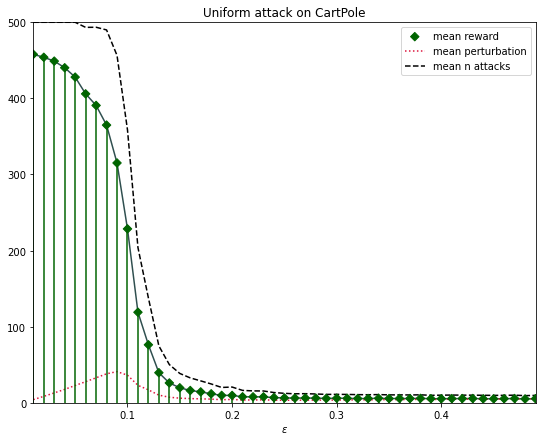

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load data
with open("./out/data/" + "uniform_attack_epsilon", 'r') as f:
    data_df = pd.read_csv(f, index_col=0)

# Plot data_df
plt.figure(figsize=(9,7))
plt.plot(data_df.index, data_df['mean_rew'], color='darkslategray', alpha=1, zorder=0)
plt.vlines(data_df.index, ymin=0, ymax=data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), alpha=1, zorder=1)
plt.scatter(data_df.index, data_df['mean_rew'], color=np.where(data_df['mean_rew'] < 0, 'maroon', 'darkgreen'), label='mean reward', marker='D', alpha=1, zorder=2)

plt.plot(data_df.index, data_df['mean_perturbation'], label='mean perturbation', color='crimson', linestyle='dotted', alpha=1, zorder=0)

# plt.plot(data_df.index, data_df['mean_n_timesteps'], label='mean n timesteps', color='purple', linestyle='dotted', alpha=1, zorder=0)

plt.plot(data_df.index, data_df['mean_n_attacks'], label='mean n attacks', color='black', linestyle='dashed', alpha=1, zorder=0)

plt.title("Uniform attack on CartPole")
plt.legend()
plt.xlabel('$\epsilon$')
# plt.ylabel()
plt.axis([0.01, 0.49, 0, 500]) # plt.axis([xmin, xmax, ymin, ymax])
plt.show()